In [1]:
'With or without Baby in carrier seat Detection using RanFor model and SVM model'

'With or without Baby in carrier seat Detection using RanFor model and SVM model'

In [2]:
import gc
gc.collect()

3

In [3]:
%reset -f

In [4]:
# Import every packages for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preprocessing

# Add measurements for withoutbaby

In [5]:
import numpy as np
import pandas as pd
import os
# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
#file_path = 'Carrierseat_withoutbaby_npy_array_Lowpassfiltered_label_0.npy'

# Path to the file (same as used when saving)
file_path = os.path.join("..", "..", "Data", "Processed",
    "CarrierSeat_withoutBaby_Lowpassfilered_Label_0.npy")


# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_withoutbaby = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000,104749.366658,0.000000,0.0
1,78.125,52421.282760,-3.130457,0.0
2,156.250,2858.080997,1.630063,0.0
3,234.375,2785.146203,-0.997409,0.0
4,312.500,1836.985949,2.804369,0.0
...,...,...,...,...
24995,-390.625,2292.262638,1.045935,0.0
24996,-312.500,1836.985949,-2.804369,0.0
24997,-234.375,2785.146203,0.997409,0.0
24998,-156.250,2858.080997,-1.630063,0.0


In [6]:
num_rows_withoutbaby = len(dataframe_withoutbaby)
num_rows_withoutbaby

25000

In [7]:
fft_magnitudes_withoutbaby = dataframe_withoutbaby["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_withoutbaby

array([104749.36665761,  52421.28276004,   2858.08099686, ...,
         2785.14620296,   2858.08099686,  52421.28276004], shape=(25000,))

In [8]:
fft_frequencies_withoutbaby = dataframe_withoutbaby["Frequency"].values  # Convert to NumPy array
fft_frequencies_withoutbaby

array([   0.   ,   78.125,  156.25 , ..., -234.375, -156.25 ,  -78.125],
      shape=(25000,))

In [9]:
fft_phase_withoutbaby = dataframe_withoutbaby["Phase"].values  # Convert to NumPy array
fft_phase_withoutbaby

array([ 0.        , -3.13045712,  1.6300633 , ...,  0.99740917,
       -1.6300633 ,  3.13045712], shape=(25000,))

In [10]:
import numpy as np
from scipy.stats import entropy
from scipy.signal import find_peaks

def extract_features(fft_freqs, fft_mags, fft_phase):
    # Normalize magnitudes to prevent division errors
    norm_mags = fft_mags / np.sum(fft_mags) if np.sum(fft_mags) > 0 else fft_mags
    
    # Spectral Centroid (Weighted Mean of Frequencies)
    spectral_centroid = np.sum(fft_freqs * norm_mags) / np.sum(norm_mags)

    # Spectral Bandwidth (Spread around centroid)
    spectral_bandwidth = np.sqrt(np.sum(norm_mags * (fft_freqs - spectral_centroid) ** 2))

    # Spectral Flatness (Geometric Mean / Arithmetic Mean)
    spectral_flatness = np.exp(np.mean(np.log(fft_mags + 1e-10))) / np.mean(fft_mags + 1e-10)

    # Find peaks in the magnitude spectrum
    peaks, _ = find_peaks(fft_mags, height=0.1 * np.max(fft_mags))  # Adaptive threshold

    # Harmonic Ratio (Ratio of 2nd peak to 1st peak)
    if len(peaks) >= 2:
        harmonic_ratio = fft_mags[peaks[1]] / fft_mags[peaks[0]]
    else:
        harmonic_ratio = 0  # No second peak detected

    # Phase Features
    phase_variance = np.var(fft_phase)  # Variance of phase angles
    phase_mean = np.mean(fft_phase)  # Mean of phase angles
    phase_diff = np.mean(np.diff(fft_phase))  # Average phase difference between frequencies

    return {
        "mean_fft": np.mean(fft_mags),
        "std_fft": np.std(fft_mags),
        "max_fft": np.max(fft_mags),
        "min_fft": np.min(fft_mags),
        "median_fft": np.median(fft_mags),
        "sum_fft": np.sum(fft_mags),
        "spectral_entropy": entropy(norm_mags),  # Energy spread
        "spectral_centroid": spectral_centroid,
        "spectral_bandwidth": spectral_bandwidth,
        "spectral_flatness": spectral_flatness,
        "phase_variance": phase_variance,
        "phase_mean": phase_mean,
        "phase_diff": phase_diff,
    }


In [11]:
# Function to apply perturbation based on reference values
def add_perturbation(reference_features, num_rows, perturb_range=0.03):
    perturbed_data = []
    
    for _ in range(num_rows):
        perturbed_features = {
            key: value * (1 + np.random.uniform(-perturb_range, perturb_range)) 
            for key, value in reference_features.items()
        }
        perturbed_data.append(perturbed_features)
    
    return pd.DataFrame(perturbed_data)

In [12]:

# Extract features for fft_withoutbaby
reference_features_withoutbaby = extract_features(fft_frequencies_withoutbaby, fft_magnitudes_withoutbaby, fft_phase_withoutbaby)
reference_features_withoutbaby



{'mean_fft': np.float64(923.9775302360855),
 'std_fft': np.float64(981.478039746996),
 'max_fft': np.float64(104749.36665761432),
 'min_fft': np.float64(0.9930308466425066),
 'median_fft': np.float64(811.7366984954034),
 'sum_fft': np.float64(23099438.255902138),
 'spectral_entropy': np.float64(9.920158431589652),
 'spectral_centroid': np.float64(-9.408936402178371),
 'spectral_bandwidth': np.float64(580645.5976533873),
 'spectral_flatness': np.float64(0.8088751643459555),
 'phase_variance': np.float64(3.296413078787201),
 'phase_mean': np.float64(5.2295945351943375e-17),
 'phase_diff': np.float64(0.00012522329371768507)}

In [13]:
# Generate a DataFrame with perturbed values for all rows in fft_withoutbaby
num_rows_withoutbaby = len(dataframe_withoutbaby)
perturbed_withoutbaby_df = add_perturbation(reference_features_withoutbaby, num_rows_withoutbaby, perturb_range=0.03)
perturbed_withoutbaby_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,914.750201,958.246528,104114.258656,0.984024,811.280217,2.252215e+07,9.733365,-9.624878,594932.024997,0.829145,3.243423,5.160720e-17,0.000123
1,938.593646,993.196904,105440.686419,1.020338,806.385339,2.348004e+07,10.156822,-9.474724,589411.312477,0.807984,3.348780,5.120691e-17,0.000122
2,941.234359,1000.422026,107483.764111,0.984008,815.063841,2.290604e+07,9.742025,-9.645258,571223.867611,0.815715,3.266146,5.227246e-17,0.000129
3,917.734521,965.225081,107487.020088,1.020262,792.949605,2.333298e+07,9.880748,-9.645262,591569.714820,0.792827,3.392792,5.163605e-17,0.000122
4,911.078793,969.798145,106243.818660,0.998602,788.356406,2.340909e+07,9.883144,-9.525314,577941.708113,0.827426,3.202548,5.302894e-17,0.000123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,943.296857,963.851618,102506.057615,1.008990,822.679134,2.246028e+07,9.755686,-9.253059,574228.922710,0.806754,3.214140,5.177300e-17,0.000123
24996,923.303223,993.097542,106062.631325,0.984488,804.904830,2.294772e+07,9.623806,-9.291582,576922.847615,0.810365,3.198823,5.322641e-17,0.000123
24997,905.532153,961.915878,101874.066180,0.981351,828.744871,2.249331e+07,9.686775,-9.656456,586708.765597,0.797804,3.254274,5.310406e-17,0.000126
24998,950.570541,979.712112,102798.138317,0.971494,811.328963,2.273053e+07,9.719953,-9.314435,594206.121811,0.816395,3.278416,5.341201e-17,0.000126


In [14]:
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000,104749.366658,0.000000,0.0
1,78.125,52421.282760,-3.130457,0.0
2,156.250,2858.080997,1.630063,0.0
3,234.375,2785.146203,-0.997409,0.0
4,312.500,1836.985949,2.804369,0.0
...,...,...,...,...
24995,-390.625,2292.262638,1.045935,0.0
24996,-312.500,1836.985949,-2.804369,0.0
24997,-234.375,2785.146203,0.997409,0.0
24998,-156.250,2858.080997,-1.630063,0.0


In [15]:
len(perturbed_withoutbaby_df),len(dataframe_withoutbaby)

(25000, 25000)

In [16]:

# Ensure both DataFrames have the same number of rows
if len(dataframe_withoutbaby) != len(perturbed_withoutbaby_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_withoutbaby_withfeatures = pd.concat([dataframe_withoutbaby, perturbed_withoutbaby_df], axis=1)

# Display the first few rows of the updated dataframe_withoutbaby to verify
dataframe_withoutbaby_withfeatures.head()

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000,104749.366658,0.000000,0.0,914.750201,958.246528,104114.258656,0.984024,811.280217,2.252215e+07,9.733365,-9.624878,594932.024997,0.829145,3.243423,5.160720e-17,0.000123
1,78.125,52421.282760,-3.130457,0.0,938.593646,993.196904,105440.686419,1.020338,806.385339,2.348004e+07,10.156822,-9.474724,589411.312477,0.807984,3.348780,5.120691e-17,0.000122
2,156.250,2858.080997,1.630063,0.0,941.234359,1000.422026,107483.764111,0.984008,815.063841,2.290604e+07,9.742025,-9.645258,571223.867611,0.815715,3.266146,5.227246e-17,0.000129
3,234.375,2785.146203,-0.997409,0.0,917.734521,965.225081,107487.020088,1.020262,792.949605,2.333298e+07,9.880748,-9.645262,591569.714820,0.792827,3.392792,5.163605e-17,0.000122
4,312.500,1836.985949,2.804369,0.0,911.078793,969.798145,106243.818660,0.998602,788.356406,2.340909e+07,9.883144,-9.525314,577941.708113,0.827426,3.202548,5.302894e-17,0.000123


In [17]:
len(dataframe_withoutbaby_withfeatures)

25000

In [18]:
dataframe_withoutbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000,104749.366658,0.000000,0.0,914.750201,958.246528,104114.258656,0.984024,811.280217,2.252215e+07,9.733365,-9.624878,594932.024997,0.829145,3.243423,5.160720e-17,0.000123
1,78.125,52421.282760,-3.130457,0.0,938.593646,993.196904,105440.686419,1.020338,806.385339,2.348004e+07,10.156822,-9.474724,589411.312477,0.807984,3.348780,5.120691e-17,0.000122
2,156.250,2858.080997,1.630063,0.0,941.234359,1000.422026,107483.764111,0.984008,815.063841,2.290604e+07,9.742025,-9.645258,571223.867611,0.815715,3.266146,5.227246e-17,0.000129
3,234.375,2785.146203,-0.997409,0.0,917.734521,965.225081,107487.020088,1.020262,792.949605,2.333298e+07,9.880748,-9.645262,591569.714820,0.792827,3.392792,5.163605e-17,0.000122
4,312.500,1836.985949,2.804369,0.0,911.078793,969.798145,106243.818660,0.998602,788.356406,2.340909e+07,9.883144,-9.525314,577941.708113,0.827426,3.202548,5.302894e-17,0.000123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-390.625,2292.262638,1.045935,0.0,943.296857,963.851618,102506.057615,1.008990,822.679134,2.246028e+07,9.755686,-9.253059,574228.922710,0.806754,3.214140,5.177300e-17,0.000123
24996,-312.500,1836.985949,-2.804369,0.0,923.303223,993.097542,106062.631325,0.984488,804.904830,2.294772e+07,9.623806,-9.291582,576922.847615,0.810365,3.198823,5.322641e-17,0.000123
24997,-234.375,2785.146203,0.997409,0.0,905.532153,961.915878,101874.066180,0.981351,828.744871,2.249331e+07,9.686775,-9.656456,586708.765597,0.797804,3.254274,5.310406e-17,0.000126
24998,-156.250,2858.080997,-1.630063,0.0,950.570541,979.712112,102798.138317,0.971494,811.328963,2.273053e+07,9.719953,-9.314435,594206.121811,0.816395,3.278416,5.341201e-17,0.000126


# Withbaby measurements

In [19]:
import numpy as np
import pandas as pd
import os
# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
#file_path = 'Withbaby_npy_array_Lowpassfiltered.npy'

# Path to the file (same as used when saving)
file_path = os.path.join("..", "..", "Data", "Processed",
    "Withbaby_npy_array_Lowpassfiltered.npy")


# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_withbaby = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,85482.192762,2.659895e-18,1.0
1,92.917460,40258.220857,-3.125651e+00,1.0
2,185.834919,5221.175683,2.865319e+00,1.0
3,278.752379,3160.342162,-3.600372e-01,1.0
4,371.669838,110.182115,-4.779431e-01,1.0
...,...,...,...,...
21015,-464.587298,862.049715,2.715918e+00,1.0
21016,-371.669838,110.182115,4.779431e-01,1.0
21017,-278.752379,3160.342162,3.600372e-01,1.0
21018,-185.834919,5221.175683,-2.865319e+00,1.0


In [20]:
num_rows_withbaby = len(dataframe_withbaby)
num_rows_withbaby

21020

In [21]:
fft_magnitudes_withbaby = dataframe_withbaby["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_withbaby

array([85482.19276229, 40258.2208573 ,  5221.17568315, ...,
        3160.34216223,  5221.17568315, 40258.2208573 ], shape=(21020,))

In [22]:
fft_frequencies_withbaby = dataframe_withbaby["Frequency"].values  # Convert to NumPy array
fft_frequencies_withbaby

array([   0.        ,   92.91745956,  185.83491912, ..., -278.75237869,
       -185.83491912,  -92.91745956], shape=(21020,))

In [23]:
fft_phase_withbaby = dataframe_withbaby["Phase"].values  # Convert to NumPy array
fft_phase_withbaby

array([ 2.65989521e-18, -3.12565096e+00,  2.86531883e+00, ...,
        3.60037221e-01, -2.86531883e+00,  3.12565096e+00], shape=(21020,))

In [24]:
# Extract features for fft_withbaby
reference_features_withbaby = extract_features(fft_frequencies_withbaby, fft_magnitudes_withbaby, fft_phase_withbaby)
reference_features_withbaby



{'mean_fft': np.float64(1324.5490253896191),
 'std_fft': np.float64(1163.1363362657507),
 'max_fft': np.float64(85482.19276229314),
 'min_fft': np.float64(5.39114437034456),
 'median_fft': np.float64(1093.2807341922792),
 'sum_fft': np.float64(27842020.513689794),
 'spectral_entropy': np.float64(9.714927149619292),
 'spectral_centroid': np.float64(-29.998974694812205),
 'spectral_bandwidth': np.float64(605607.1902130501),
 'spectral_flatness': np.float64(0.7742902453764394),
 'phase_variance': np.float64(3.3064155598843628),
 'phase_mean': np.float64(0.00014945730987581745),
 'phase_diff': np.float64(0.00014870597824614428)}

In [25]:
# Generate a DataFrame with perturbed values for all rows in fft_withoutbaby
num_rows_withbaby = len(dataframe_withbaby)
perturbed_withbaby_df = add_perturbation(reference_features_withbaby, num_rows_withbaby, perturb_range=0.03)
perturbed_withbaby_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,1295.925067,1160.747285,85030.057405,5.528651,1067.912199,2.818798e+07,9.902076,-30.022980,622874.882416,0.774664,3.316224,0.000145,0.000149
1,1292.205971,1171.027330,85640.909128,5.275916,1124.805331,2.797411e+07,9.834064,-29.587088,592759.191572,0.794276,3.390422,0.000153,0.000148
2,1344.283380,1181.167133,82982.838349,5.304229,1116.611697,2.811521e+07,9.865934,-29.511123,614579.233121,0.785252,3.274233,0.000150,0.000150
3,1291.093542,1161.434673,87960.979708,5.347835,1067.370326,2.830248e+07,9.842504,-29.767534,620629.366654,0.758064,3.263008,0.000146,0.000152
4,1286.405871,1175.122886,84547.561161,5.406493,1073.758686,2.831002e+07,9.697993,-29.724096,599189.521757,0.773667,3.270924,0.000149,0.000151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21015,1320.584101,1134.235302,84872.862554,5.493761,1114.299824,2.828110e+07,9.854948,-29.948062,594755.162695,0.782840,3.208814,0.000149,0.000146
21016,1316.192509,1190.265063,87409.243455,5.505058,1100.411564,2.815641e+07,9.587914,-29.403624,598660.067169,0.795241,3.256629,0.000145,0.000149
21017,1316.669214,1194.421137,83705.700281,5.537675,1109.379128,2.719629e+07,9.825166,-29.506481,622741.798241,0.753598,3.371710,0.000153,0.000147
21018,1309.981881,1195.017458,85798.744642,5.313394,1096.926483,2.721818e+07,9.780653,-30.052104,617579.265268,0.780581,3.320661,0.000149,0.000152


In [26]:
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,85482.192762,2.659895e-18,1.0
1,92.917460,40258.220857,-3.125651e+00,1.0
2,185.834919,5221.175683,2.865319e+00,1.0
3,278.752379,3160.342162,-3.600372e-01,1.0
4,371.669838,110.182115,-4.779431e-01,1.0
...,...,...,...,...
21015,-464.587298,862.049715,2.715918e+00,1.0
21016,-371.669838,110.182115,4.779431e-01,1.0
21017,-278.752379,3160.342162,3.600372e-01,1.0
21018,-185.834919,5221.175683,-2.865319e+00,1.0


In [27]:
len(perturbed_withbaby_df),len(dataframe_withbaby)

(21020, 21020)

In [28]:

# Ensure both DataFrames have the same number of rows
if len(dataframe_withbaby) != len(perturbed_withbaby_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_withbaby_withfeatures = pd.concat([dataframe_withbaby, perturbed_withbaby_df], axis=1)

# Display the first few rows of the updated dataframe_withoutbaby to verify
dataframe_withbaby_withfeatures.head()

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,85482.192762,2.659895e-18,1.0,1295.925067,1160.747285,85030.057405,5.528651,1067.912199,2.818798e+07,9.902076,-30.022980,622874.882416,0.774664,3.316224,0.000145,0.000149
1,92.917460,40258.220857,-3.125651e+00,1.0,1292.205971,1171.027330,85640.909128,5.275916,1124.805331,2.797411e+07,9.834064,-29.587088,592759.191572,0.794276,3.390422,0.000153,0.000148
2,185.834919,5221.175683,2.865319e+00,1.0,1344.283380,1181.167133,82982.838349,5.304229,1116.611697,2.811521e+07,9.865934,-29.511123,614579.233121,0.785252,3.274233,0.000150,0.000150
3,278.752379,3160.342162,-3.600372e-01,1.0,1291.093542,1161.434673,87960.979708,5.347835,1067.370326,2.830248e+07,9.842504,-29.767534,620629.366654,0.758064,3.263008,0.000146,0.000152
4,371.669838,110.182115,-4.779431e-01,1.0,1286.405871,1175.122886,84547.561161,5.406493,1073.758686,2.831002e+07,9.697993,-29.724096,599189.521757,0.773667,3.270924,0.000149,0.000151


In [29]:
dataframe_withbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,85482.192762,2.659895e-18,1.0,1295.925067,1160.747285,85030.057405,5.528651,1067.912199,2.818798e+07,9.902076,-30.022980,622874.882416,0.774664,3.316224,0.000145,0.000149
1,92.917460,40258.220857,-3.125651e+00,1.0,1292.205971,1171.027330,85640.909128,5.275916,1124.805331,2.797411e+07,9.834064,-29.587088,592759.191572,0.794276,3.390422,0.000153,0.000148
2,185.834919,5221.175683,2.865319e+00,1.0,1344.283380,1181.167133,82982.838349,5.304229,1116.611697,2.811521e+07,9.865934,-29.511123,614579.233121,0.785252,3.274233,0.000150,0.000150
3,278.752379,3160.342162,-3.600372e-01,1.0,1291.093542,1161.434673,87960.979708,5.347835,1067.370326,2.830248e+07,9.842504,-29.767534,620629.366654,0.758064,3.263008,0.000146,0.000152
4,371.669838,110.182115,-4.779431e-01,1.0,1286.405871,1175.122886,84547.561161,5.406493,1073.758686,2.831002e+07,9.697993,-29.724096,599189.521757,0.773667,3.270924,0.000149,0.000151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21015,-464.587298,862.049715,2.715918e+00,1.0,1320.584101,1134.235302,84872.862554,5.493761,1114.299824,2.828110e+07,9.854948,-29.948062,594755.162695,0.782840,3.208814,0.000149,0.000146
21016,-371.669838,110.182115,4.779431e-01,1.0,1316.192509,1190.265063,87409.243455,5.505058,1100.411564,2.815641e+07,9.587914,-29.403624,598660.067169,0.795241,3.256629,0.000145,0.000149
21017,-278.752379,3160.342162,3.600372e-01,1.0,1316.669214,1194.421137,83705.700281,5.537675,1109.379128,2.719629e+07,9.825166,-29.506481,622741.798241,0.753598,3.371710,0.000153,0.000147
21018,-185.834919,5221.175683,-2.865319e+00,1.0,1309.981881,1195.017458,85798.744642,5.313394,1096.926483,2.721818e+07,9.780653,-30.052104,617579.265268,0.780581,3.320661,0.000149,0.000152


In [30]:
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000,104749.366658,0.000000,0.0
1,78.125,52421.282760,-3.130457,0.0
2,156.250,2858.080997,1.630063,0.0
3,234.375,2785.146203,-0.997409,0.0
4,312.500,1836.985949,2.804369,0.0
...,...,...,...,...
24995,-390.625,2292.262638,1.045935,0.0
24996,-312.500,1836.985949,-2.804369,0.0
24997,-234.375,2785.146203,0.997409,0.0
24998,-156.250,2858.080997,-1.630063,0.0


In [31]:
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,85482.192762,2.659895e-18,1.0
1,92.917460,40258.220857,-3.125651e+00,1.0
2,185.834919,5221.175683,2.865319e+00,1.0
3,278.752379,3160.342162,-3.600372e-01,1.0
4,371.669838,110.182115,-4.779431e-01,1.0
...,...,...,...,...
21015,-464.587298,862.049715,2.715918e+00,1.0
21016,-371.669838,110.182115,4.779431e-01,1.0
21017,-278.752379,3160.342162,3.600372e-01,1.0
21018,-185.834919,5221.175683,-2.865319e+00,1.0


In [32]:
# Vertical concatenation
dataset_1_rawdata = pd.concat([dataframe_withoutbaby,dataframe_withbaby])
dataset_1_rawdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,104749.366658,0.000000,0.0
1,78.125000,52421.282760,-3.130457,0.0
2,156.250000,2858.080997,1.630063,0.0
3,234.375000,2785.146203,-0.997409,0.0
4,312.500000,1836.985949,2.804369,0.0
...,...,...,...,...
21015,-464.587298,862.049715,2.715918,1.0
21016,-371.669838,110.182115,0.477943,1.0
21017,-278.752379,3160.342162,0.360037,1.0
21018,-185.834919,5221.175683,-2.865319,1.0


In [33]:
# Resetting the index if unique indices are needed
dataset_1_rawdata = dataset_1_rawdata.reset_index(drop=True)
dataset_1_rawdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,104749.366658,0.000000,0.0
1,78.125000,52421.282760,-3.130457,0.0
2,156.250000,2858.080997,1.630063,0.0
3,234.375000,2785.146203,-0.997409,0.0
4,312.500000,1836.985949,2.804369,0.0
...,...,...,...,...
46015,-464.587298,862.049715,2.715918,1.0
46016,-371.669838,110.182115,0.477943,1.0
46017,-278.752379,3160.342162,0.360037,1.0
46018,-185.834919,5221.175683,-2.865319,1.0


In [34]:
dataframe_withoutbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000,104749.366658,0.000000,0.0,914.750201,958.246528,104114.258656,0.984024,811.280217,2.252215e+07,9.733365,-9.624878,594932.024997,0.829145,3.243423,5.160720e-17,0.000123
1,78.125,52421.282760,-3.130457,0.0,938.593646,993.196904,105440.686419,1.020338,806.385339,2.348004e+07,10.156822,-9.474724,589411.312477,0.807984,3.348780,5.120691e-17,0.000122
2,156.250,2858.080997,1.630063,0.0,941.234359,1000.422026,107483.764111,0.984008,815.063841,2.290604e+07,9.742025,-9.645258,571223.867611,0.815715,3.266146,5.227246e-17,0.000129
3,234.375,2785.146203,-0.997409,0.0,917.734521,965.225081,107487.020088,1.020262,792.949605,2.333298e+07,9.880748,-9.645262,591569.714820,0.792827,3.392792,5.163605e-17,0.000122
4,312.500,1836.985949,2.804369,0.0,911.078793,969.798145,106243.818660,0.998602,788.356406,2.340909e+07,9.883144,-9.525314,577941.708113,0.827426,3.202548,5.302894e-17,0.000123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-390.625,2292.262638,1.045935,0.0,943.296857,963.851618,102506.057615,1.008990,822.679134,2.246028e+07,9.755686,-9.253059,574228.922710,0.806754,3.214140,5.177300e-17,0.000123
24996,-312.500,1836.985949,-2.804369,0.0,923.303223,993.097542,106062.631325,0.984488,804.904830,2.294772e+07,9.623806,-9.291582,576922.847615,0.810365,3.198823,5.322641e-17,0.000123
24997,-234.375,2785.146203,0.997409,0.0,905.532153,961.915878,101874.066180,0.981351,828.744871,2.249331e+07,9.686775,-9.656456,586708.765597,0.797804,3.254274,5.310406e-17,0.000126
24998,-156.250,2858.080997,-1.630063,0.0,950.570541,979.712112,102798.138317,0.971494,811.328963,2.273053e+07,9.719953,-9.314435,594206.121811,0.816395,3.278416,5.341201e-17,0.000126


In [35]:
dataframe_withbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,85482.192762,2.659895e-18,1.0,1295.925067,1160.747285,85030.057405,5.528651,1067.912199,2.818798e+07,9.902076,-30.022980,622874.882416,0.774664,3.316224,0.000145,0.000149
1,92.917460,40258.220857,-3.125651e+00,1.0,1292.205971,1171.027330,85640.909128,5.275916,1124.805331,2.797411e+07,9.834064,-29.587088,592759.191572,0.794276,3.390422,0.000153,0.000148
2,185.834919,5221.175683,2.865319e+00,1.0,1344.283380,1181.167133,82982.838349,5.304229,1116.611697,2.811521e+07,9.865934,-29.511123,614579.233121,0.785252,3.274233,0.000150,0.000150
3,278.752379,3160.342162,-3.600372e-01,1.0,1291.093542,1161.434673,87960.979708,5.347835,1067.370326,2.830248e+07,9.842504,-29.767534,620629.366654,0.758064,3.263008,0.000146,0.000152
4,371.669838,110.182115,-4.779431e-01,1.0,1286.405871,1175.122886,84547.561161,5.406493,1073.758686,2.831002e+07,9.697993,-29.724096,599189.521757,0.773667,3.270924,0.000149,0.000151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21015,-464.587298,862.049715,2.715918e+00,1.0,1320.584101,1134.235302,84872.862554,5.493761,1114.299824,2.828110e+07,9.854948,-29.948062,594755.162695,0.782840,3.208814,0.000149,0.000146
21016,-371.669838,110.182115,4.779431e-01,1.0,1316.192509,1190.265063,87409.243455,5.505058,1100.411564,2.815641e+07,9.587914,-29.403624,598660.067169,0.795241,3.256629,0.000145,0.000149
21017,-278.752379,3160.342162,3.600372e-01,1.0,1316.669214,1194.421137,83705.700281,5.537675,1109.379128,2.719629e+07,9.825166,-29.506481,622741.798241,0.753598,3.371710,0.000153,0.000147
21018,-185.834919,5221.175683,-2.865319e+00,1.0,1309.981881,1195.017458,85798.744642,5.313394,1096.926483,2.721818e+07,9.780653,-30.052104,617579.265268,0.780581,3.320661,0.000149,0.000152


In [36]:
# Vertical concatenation
dataset_1_withfeatures = pd.concat([dataframe_withoutbaby_withfeatures,dataframe_withbaby_withfeatures])
dataset_1_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,104749.366658,0.000000,0.0,914.750201,958.246528,104114.258656,0.984024,811.280217,2.252215e+07,9.733365,-9.624878,594932.024997,0.829145,3.243423,5.160720e-17,0.000123
1,78.125000,52421.282760,-3.130457,0.0,938.593646,993.196904,105440.686419,1.020338,806.385339,2.348004e+07,10.156822,-9.474724,589411.312477,0.807984,3.348780,5.120691e-17,0.000122
2,156.250000,2858.080997,1.630063,0.0,941.234359,1000.422026,107483.764111,0.984008,815.063841,2.290604e+07,9.742025,-9.645258,571223.867611,0.815715,3.266146,5.227246e-17,0.000129
3,234.375000,2785.146203,-0.997409,0.0,917.734521,965.225081,107487.020088,1.020262,792.949605,2.333298e+07,9.880748,-9.645262,591569.714820,0.792827,3.392792,5.163605e-17,0.000122
4,312.500000,1836.985949,2.804369,0.0,911.078793,969.798145,106243.818660,0.998602,788.356406,2.340909e+07,9.883144,-9.525314,577941.708113,0.827426,3.202548,5.302894e-17,0.000123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21015,-464.587298,862.049715,2.715918,1.0,1320.584101,1134.235302,84872.862554,5.493761,1114.299824,2.828110e+07,9.854948,-29.948062,594755.162695,0.782840,3.208814,1.485397e-04,0.000146
21016,-371.669838,110.182115,0.477943,1.0,1316.192509,1190.265063,87409.243455,5.505058,1100.411564,2.815641e+07,9.587914,-29.403624,598660.067169,0.795241,3.256629,1.451954e-04,0.000149
21017,-278.752379,3160.342162,0.360037,1.0,1316.669214,1194.421137,83705.700281,5.537675,1109.379128,2.719629e+07,9.825166,-29.506481,622741.798241,0.753598,3.371710,1.530737e-04,0.000147
21018,-185.834919,5221.175683,-2.865319,1.0,1309.981881,1195.017458,85798.744642,5.313394,1096.926483,2.721818e+07,9.780653,-30.052104,617579.265268,0.780581,3.320661,1.490110e-04,0.000152


# Training with rawdata

In [37]:
# Random Forest Model with raw data

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_1_rawdata.drop('Infant_Presence',axis=1)
Y = dataset_1_rawdata['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for rawdata:", accuracy_score(y_test, y_pred))
print("Classification Report for rawdata:\n", classification_report(y_test, y_pred))

RanFor Accuracy for rawdata: 0.6207083876575402
Classification Report for rawdata:
               precision    recall  f1-score   support

         0.0       0.61      0.84      0.71      5048
         1.0       0.65      0.35      0.46      4156

    accuracy                           0.62      9204
   macro avg       0.63      0.60      0.58      9204
weighted avg       0.63      0.62      0.60      9204



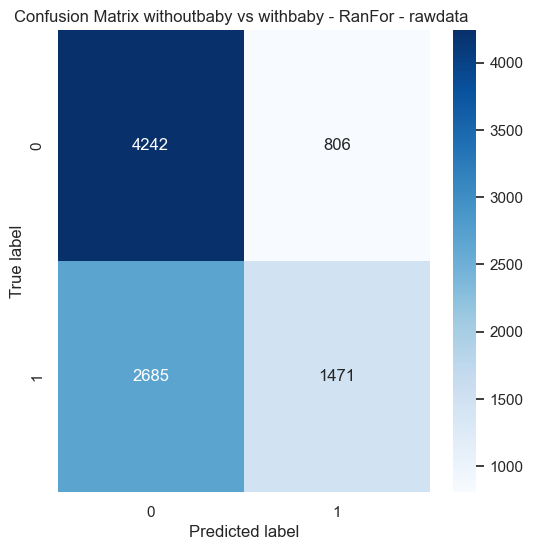

In [39]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap = "Blues", ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix withoutbaby vs withbaby - RanFor - rawdata ')
plt.show()



# Training with extracted features

In [40]:
# Random forest Model with extracted features data

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_1_withfeatures.drop('Infant_Presence',axis=1)
Y = dataset_1_withfeatures['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for extracted features data:", accuracy_score(y_test, y_pred))
print("Classification Report for extracted features data:\n", classification_report(y_test, y_pred))

RanFor Accuracy for extracted features data: 1.0
Classification Report for extracted features data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5048
         1.0       1.00      1.00      1.00      4156

    accuracy                           1.00      9204
   macro avg       1.00      1.00      1.00      9204
weighted avg       1.00      1.00      1.00      9204



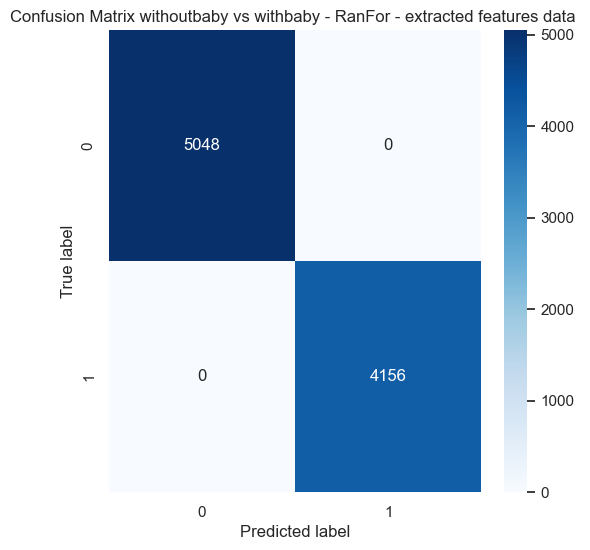

In [42]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap = "Blues", ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix withoutbaby vs withbaby - RanFor - extracted features data ')
plt.show()

# Feature selection for overcoming OVERFITTING

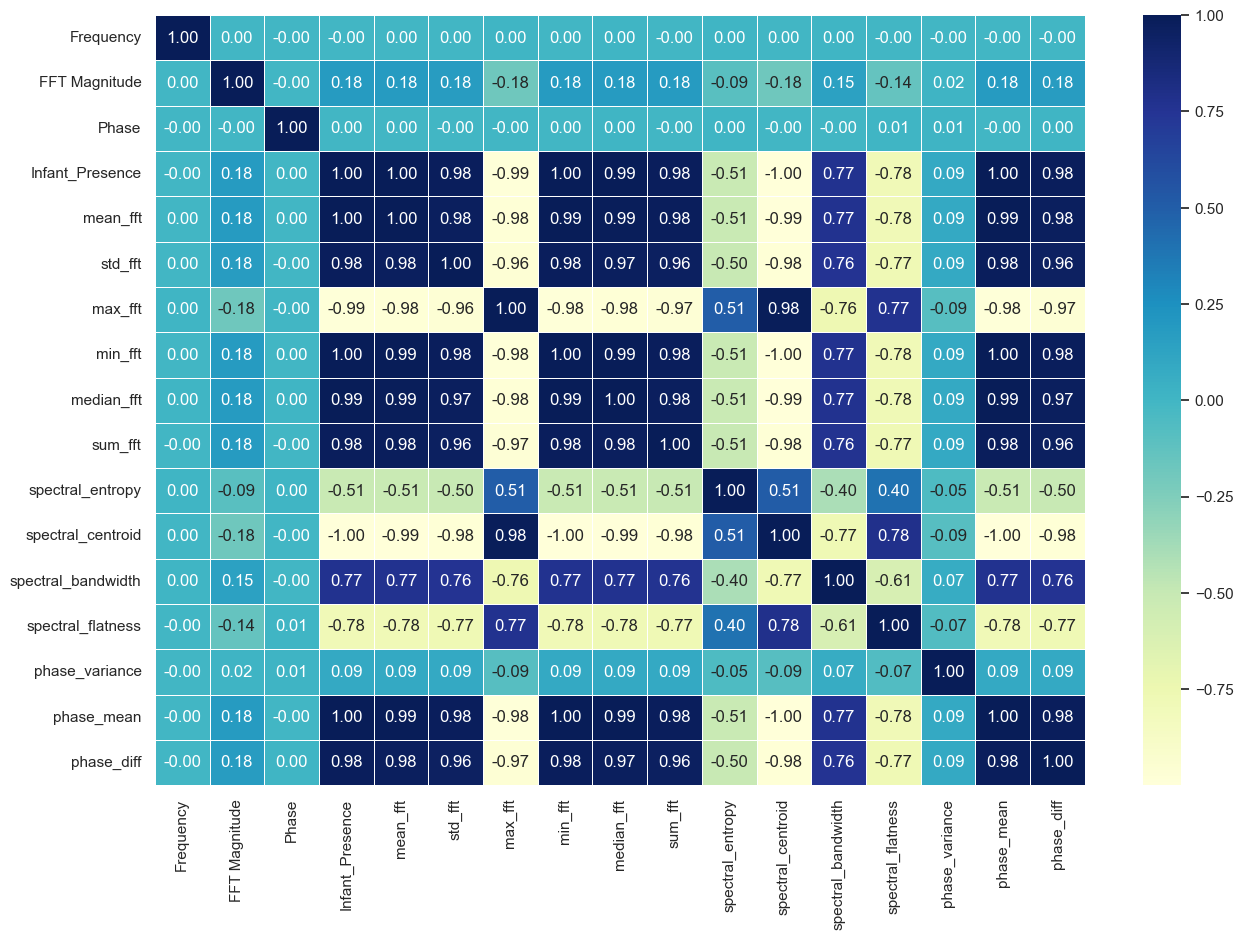

In [43]:
# Plotting correlation matrix for extracted features
corr_matrix = dataset_1_withfeatures.corr()
fig= plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')



In [44]:
# Set a threshold for correlation (e.g., 0.8)
threshold = 0.8

# Find pairs of highly correlated features
highly_correlated = np.where(np.abs(corr_matrix) > threshold)

# Create a set to store the columns to drop
to_drop = set()

# Loop through the indices of the highly correlated pairs
for i, j in zip(*highly_correlated):
    if i != j:  # Avoid diagonal (self-correlation)
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        # Ensure we do NOT drop 'Infant_Presence'
        if feature_j != "Infant_Presence":
            to_drop.add(feature_j)  # Drop one of the correlated features

# Drop the highly correlated features from the dataframe
dataset_1_reduced = dataset_1_withfeatures.drop(columns=to_drop)

# Display the dropped features and new dataframe shape
print("Dropped features: ", to_drop)
print("New dataframe shape: ", dataset_1_reduced.shape)


Dropped features:  {'sum_fft', 'phase_diff', 'spectral_centroid', 'max_fft', 'min_fft', 'std_fft', 'median_fft', 'mean_fft', 'phase_mean'}
New dataframe shape:  (46020, 8)


In [45]:
dataset_1_reduced

,Frequency,FFT Magnitude,Phase,Infant_Presence,spectral_entropy,spectral_bandwidth,spectral_flatness,phase_variance
0,0.000000,104749.366658,0.000000,0.0,9.733365,594932.024997,0.829145,3.243423
1,78.125000,52421.282760,-3.130457,0.0,10.156822,589411.312477,0.807984,3.348780
2,156.250000,2858.080997,1.630063,0.0,9.742025,571223.867611,0.815715,3.266146
3,234.375000,2785.146203,-0.997409,0.0,9.880748,591569.714820,0.792827,3.392792
4,312.500000,1836.985949,2.804369,0.0,9.883144,577941.708113,0.827426,3.202548
...,...,...,...,...,...,...,...,...
21015,-464.587298,862.049715,2.715918,1.0,9.854948,594755.162695,0.782840,3.208814
21016,-371.669838,110.182115,0.477943,1.0,9.587914,598660.067169,0.795241,3.256629
21017,-278.752379,3160.342162,0.360037,1.0,9.825166,622741.798241,0.753598,3.371710
21018,-185.834919,5221.175683,-2.865319,1.0,9.780653,617579.265268,0.780581,3.320661


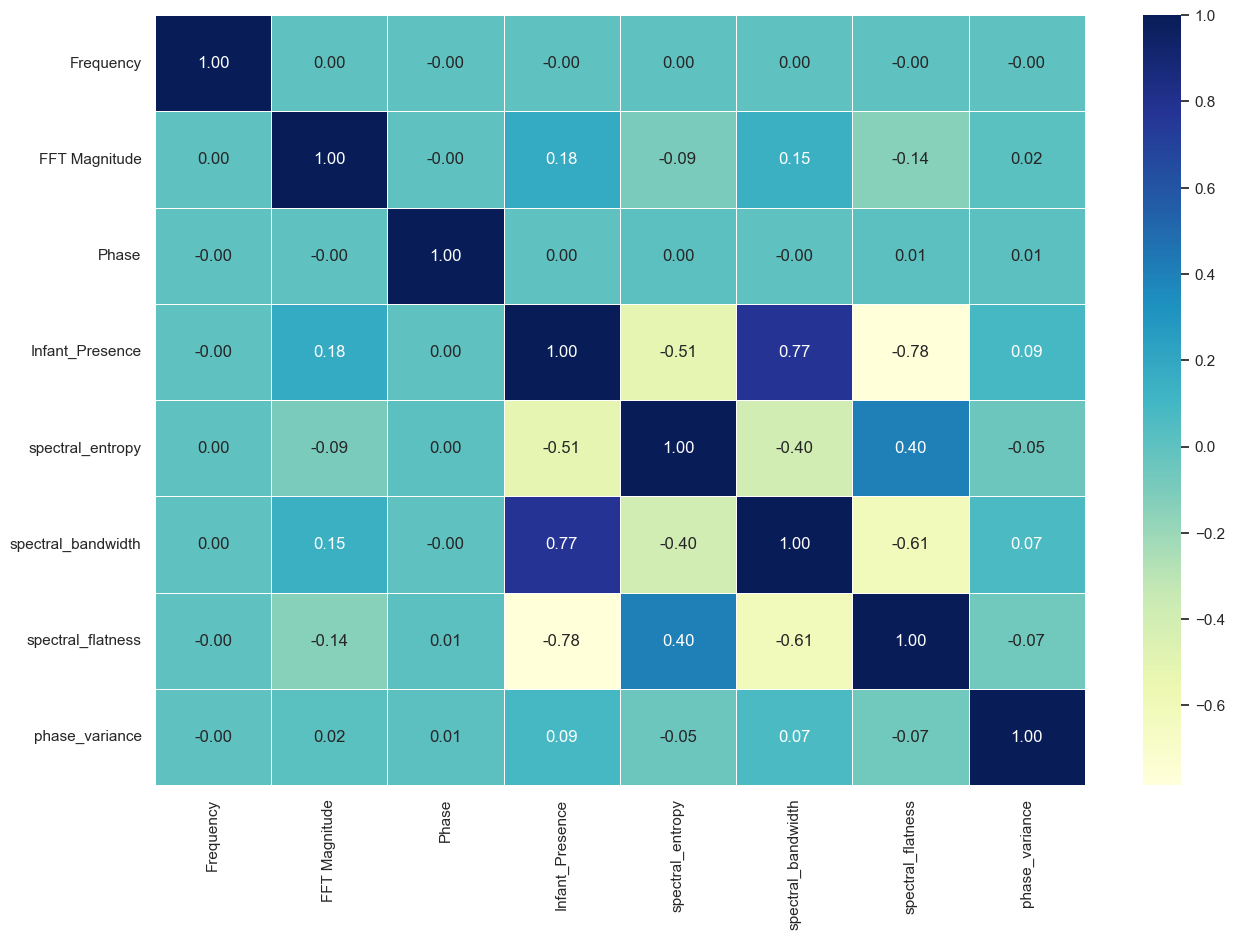

In [46]:
corr_matrix = dataset_1_reduced.corr()
fig= plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')


# Random Forest with selected features using Correlation matrix

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_1_reduced.drop('Infant_Presence',axis=1)
Y = dataset_1_reduced['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for selected features data:", accuracy_score(y_test, y_pred))
print("Classification Report for selected features data:\n", classification_report(y_test, y_pred))

RanFor Accuracy for selected features data: 0.9789222077357671
Classification Report for selected features data:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      5048
         1.0       0.99      0.96      0.98      4156

    accuracy                           0.98      9204
   macro avg       0.98      0.98      0.98      9204
weighted avg       0.98      0.98      0.98      9204



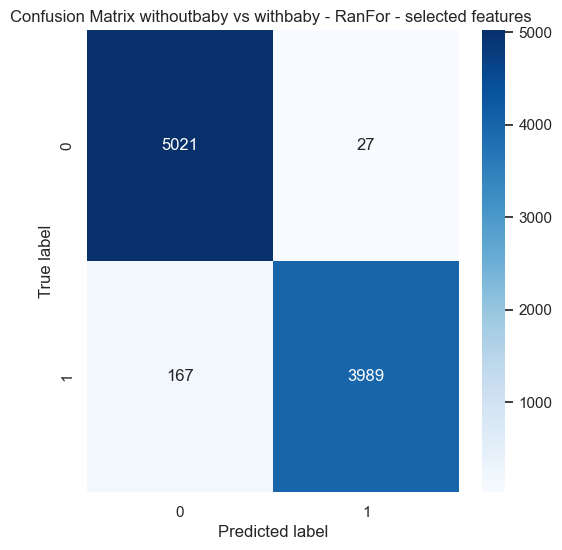

In [48]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap = "Blues", ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix withoutbaby vs withbaby - RanFor - selected features ')
plt.show()


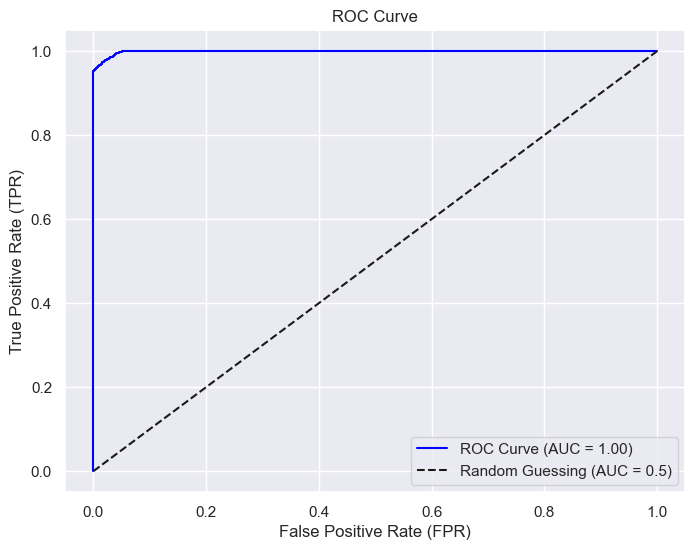

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


/var/folders/0t/2wzx3xtd1ns5x1v0k6gxp2yc0000gn/T/ipykernel_80381/3606609151.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


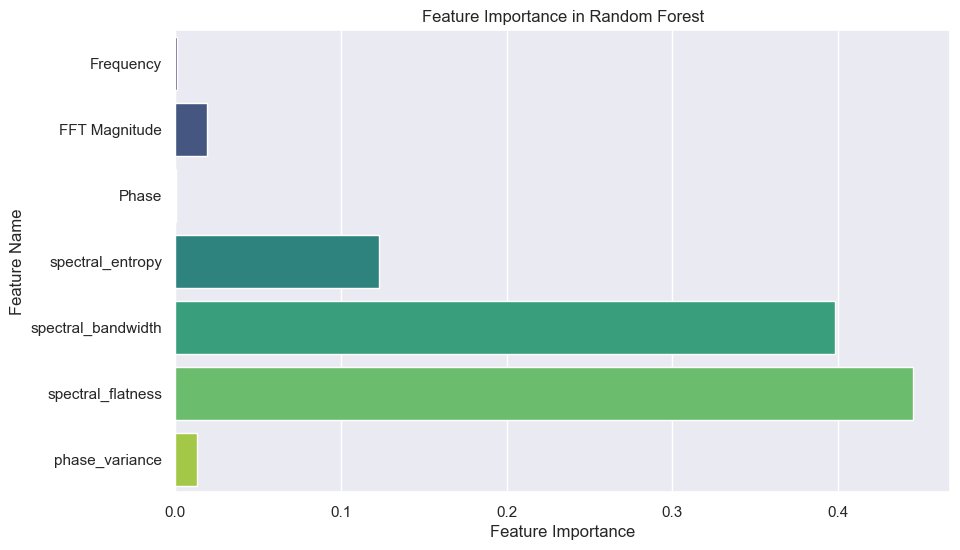

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance
feature_importances = clf.feature_importances_

# Ensure correct feature names
features = dataset_1_reduced.drop('Infant_Presence', axis=1).columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest')
plt.show()


In [51]:
import joblib
import os

# Save the trained Random Forest model
# joblib.dump(clf, 'random_forest_model_Baby_Detection.pkl')

# Define save directory (2 levels up -> Model/Baby Detection)
model_dir = os.path.join("..", "..", "Models", "Baby Detection and Seat Classification Random Forest")

# Define file path
model_path = os.path.join(model_dir, "random_forest_model_Baby_Detection.pkl")

# --- Check and replace model ---
if os.path.exists(model_path):
    os.remove(model_path)
    print(f"Old model removed: {model_path}")

# Save the trained Random Forest model
joblib.dump(clf, model_path)
print(f"New model saved at: {os.path.abspath(model_path)}")


Old model removed: ../../Models/Baby Detection and Seat Classification Random Forest/random_forest_model_Baby_Detection.pkl
New model saved at: /Users/mandarkale/Documents/MyProjects/MachineLearning/FIUS_Based_Infant_Presence_Detection_in_Car_Seats/source_code/Models/Baby Detection and Seat Classification Random Forest/random_forest_model_Baby_Detection.pkl


In [52]:
# Load the trained Random Forest model
#clf = joblib.load('random_forest_model_Baby_Detection.pkl')

# Example: Make predictions on new data
#y_pred_new = clf.predict(X_new)


# SVM Model

In [53]:
# SVM model with raw data

In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
X = dataset_1_rawdata.drop(columns=['Infant_Presence']).values
y = dataset_1_rawdata['Infant_Presence'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Evaluate SVM
print("SVM Accuracy rawdata:", accuracy_score(y_test, y_pred))
print("\nClassification Report for rawdata:\n", classification_report(y_test, y_pred))

SVM Accuracy rawdata: 0.6111473272490222

Classification Report for rawdata:
               precision    recall  f1-score   support

         0.0       0.60      0.88      0.71      5048
         1.0       0.66      0.29      0.40      4156

    accuracy                           0.61      9204
   macro avg       0.63      0.58      0.56      9204
weighted avg       0.63      0.61      0.57      9204



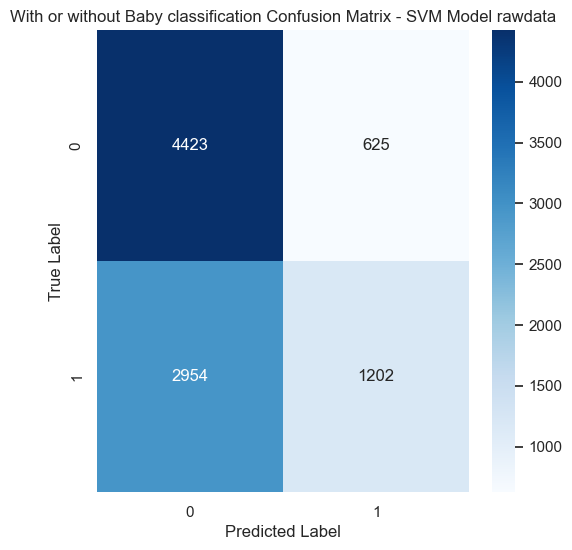

In [55]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("With or without Baby classification Confusion Matrix - SVM Model rawdata")
plt.show()

In [56]:
# SVM model with extracted features

In [57]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
X = dataset_1_withfeatures.drop(columns=['Infant_Presence']).values
y = dataset_1_withfeatures['Infant_Presence'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Evaluate SVM
print("SVM Accuracy extracted features data:", accuracy_score(y_test, y_pred))
print("\nClassification Report for extracted features data:\n", classification_report(y_test, y_pred))

SVM Accuracy extracted features data: 0.9997827031725337

Classification Report for extracted features data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5048
         1.0       1.00      1.00      1.00      4156

    accuracy                           1.00      9204
   macro avg       1.00      1.00      1.00      9204
weighted avg       1.00      1.00      1.00      9204



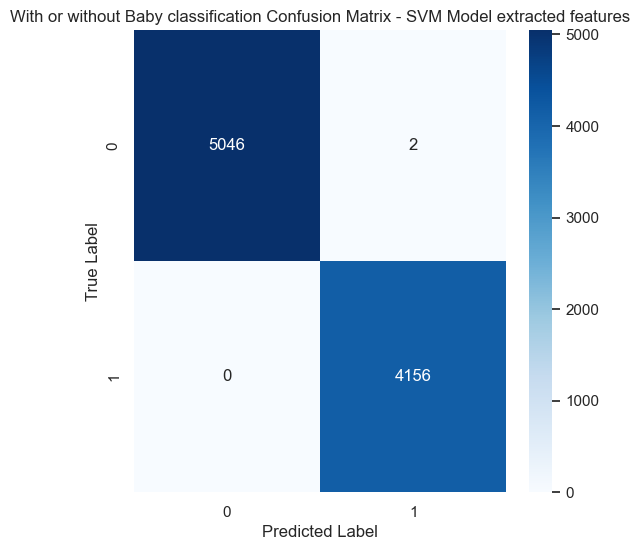

In [58]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("With or without Baby classification Confusion Matrix - SVM Model extracted features")
plt.show()

In [59]:
# SVM model with selected features using correlation matrix for overcoming overfitting

In [60]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
X = dataset_1_reduced.drop(columns=['Infant_Presence']).values
y = dataset_1_reduced['Infant_Presence'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Evaluate SVM
print("SVM Accuracy selected features data:", accuracy_score(y_test, y_pred))
print("\nClassification Report for selected features data:\n", classification_report(y_test, y_pred))

SVM Accuracy selected features data: 0.9733811386353759

Classification Report for selected features data:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      5048
         1.0       0.97      0.97      0.97      4156

    accuracy                           0.97      9204
   macro avg       0.97      0.97      0.97      9204
weighted avg       0.97      0.97      0.97      9204



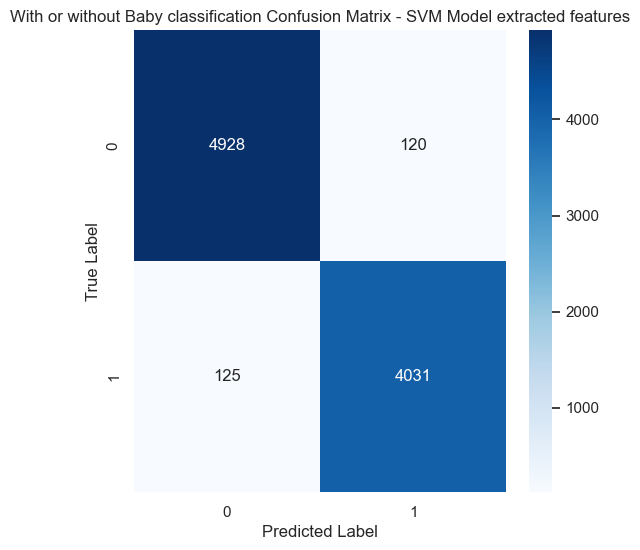

In [61]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("With or without Baby classification Confusion Matrix - SVM Model extracted features")
plt.show()

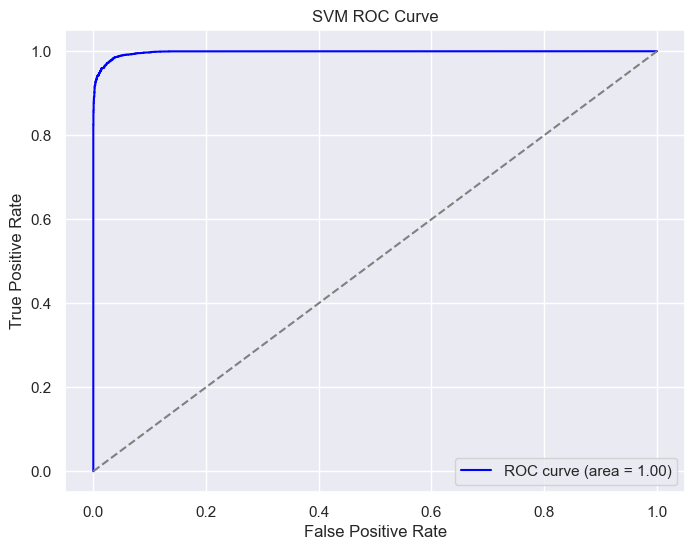

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import permutation_importance

# Enable probability estimation in SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

# Get predicted probabilities for ROC curve
y_probs = svm_model.predict_proba(X_test)[:, 1]  

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()



/var/folders/0t/2wzx3xtd1ns5x1v0k6gxp2yc0000gn/T/ipykernel_80381/625188403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


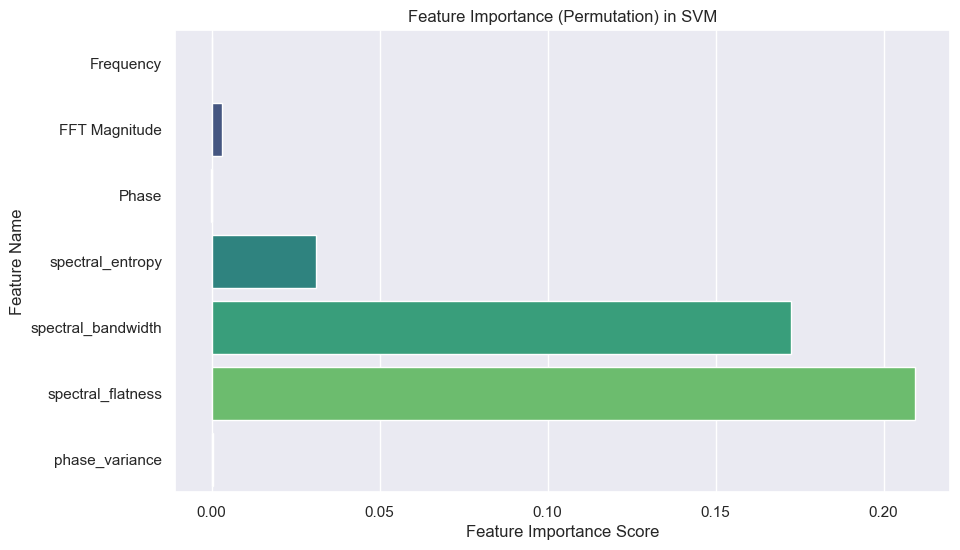

In [63]:
# Compute Feature Importance using Permutation Importance
perm_importance = permutation_importance(svm_model, X_test, y_test, scoring='accuracy')
feature_importances = perm_importance.importances_mean

# Ensure correct feature names
features = dataset_1_reduced.drop(columns=['Infant_Presence']).columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance (Permutation) in SVM')
plt.show()


In [64]:
import os
import joblib

# Save the trained SVM model
# joblib.dump(svm_model, 'svm_model_Baby_Detection.pkl')

# Save the scaler
# joblib.dump(scaler, 'svm_scaler_Baby_Detection.pkl')

# Define save directory (2 levels up -> Model/Baby Detection)
model_dir = os.path.join("..", "..", "Models", "Baby Detection")
os.makedirs(model_dir, exist_ok=True)  # ensure directory exists

# Define file paths
model_path = os.path.join(model_dir, "svm_model_Baby_Detection.pkl")
scaler_path = os.path.join(model_dir, "svm_scaler_Baby_Detection.pkl")

# --- Check and replace SVM model ---
if os.path.exists(model_path):
    os.remove(model_path)
    print(f"Old model removed: {model_path}")

joblib.dump(svm_model, model_path)
print(f"New model saved at: {os.path.abspath(model_path)}")

# --- Check and replace Scaler ---
if os.path.exists(scaler_path):
    os.remove(scaler_path)
    print(f"Old scaler removed: {scaler_path}")

joblib.dump(scaler, scaler_path)
print(f"New scaler saved at: {os.path.abspath(scaler_path)}")


Old model removed: ../../Models/Baby Detection/svm_model_Baby_Detection.pkl
New model saved at: /Users/mandarkale/Documents/MyProjects/MachineLearning/FIUS_Based_Infant_Presence_Detection_in_Car_Seats/source_code/Models/Baby Detection/svm_model_Baby_Detection.pkl
Old scaler removed: ../../Models/Baby Detection/svm_scaler_Baby_Detection.pkl
New scaler saved at: /Users/mandarkale/Documents/MyProjects/MachineLearning/FIUS_Based_Infant_Presence_Detection_in_Car_Seats/source_code/Models/Baby Detection/svm_scaler_Baby_Detection.pkl


In [65]:
# Load the trained SVM model
#svm_model = joblib.load('svm_model_Baby_Detection.pkl')

# Load the scaler
#scaler = joblib.load('svm_scaler_Baby_Detection.pkl')

# Example: Transform new data and make predictions
#X_new_scaled = scaler.transform(X_new)
#y_pred = svm_model.predict(X_new_scaled)
